In [48]:
import numpy as np
from datetime import datetime
from siphon.catalog import TDSCatalog
import xarray as xr
from xarray.backends import NetCDF4DataStore
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

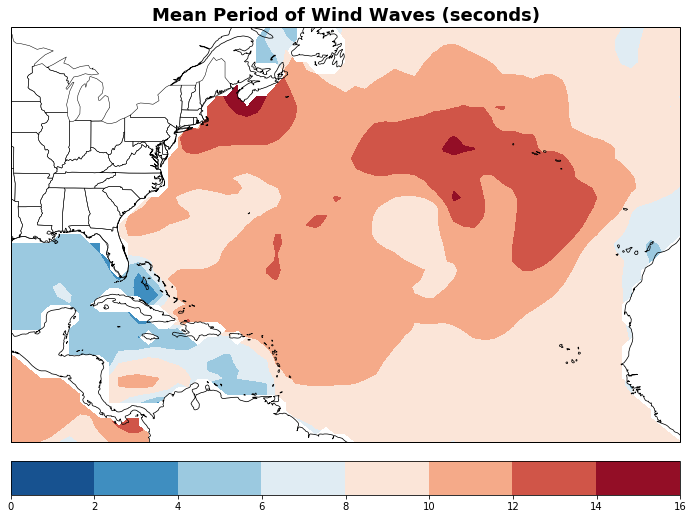

In [97]:
# Example method: OPENDaP
# base_url = 'https://www.ncei.noaa.gov/thredds/dodsC/namanl'
# dt = datetime(2016, 4, 16, 18)
# ds = xr.open_dataset('{}{dt:%Y%m}/{dt:%Y%m%d}/namanl_218_{dt:%Y%m%d}_'
#                     '{dt:%H}00_000.grb'.format(base_url, dt=dt),
#                     decode_times=True)

base_url = 'https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww320191001/nww320191001_06z'
ds = xr.open_dataset(base_url, decode_times=True)

lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
time = ds.variables['time'][:]
wave_period = ds.variables['wvpersfc']

crs = ccrs.Mercator()

#Forecast Hour
FH = 2

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=crs)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
ax.add_feature(cfeature.STATES, linewidth=0.5)

# Plot data
contour = ax.contourf(lon, lat, wave_period[FH, :, :], cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())

# Colorbar
cb = fig.colorbar(contour, orientation='horizontal', pad=0.03)

ax.set_extent([-95, -10, 5, 50], crs=ccrs.PlateCarree())

# Make the axis title
ax.set_title('Mean Period of Wind Waves (seconds)', loc='center', fontsize=18, fontweight='bold')

# Save and show figure
plt.savefig('wave_period.png', bbox_inches='tight', dpi=300)
plt.show()

# reflectivity = ds['MaximumComposite_radar_reflectivity_entire_atmosphere']

# reflectivity.sel(latitude=29.65, longitude=277.68, method='nearest')


In [4]:
# Example using siphon
# GOES16 Satellite

date = datetime.utcnow()
channel = 8
region = 'CONUS'

cat = TDSCatalog('http://thredds-test.unidata.ucar.edu/thredds/catalog/satellite/goes16/GOES16'
                '{}/Channel{:02d}/{:%Y%m%d}/catlog.xml'.format(region, channel, date))
ds = cat.datasets[-2]
ds = ds.remote_access(service='OPENDAP')
ds = xr.open_dataset(NetCDF4DataStore(ds))
ds